In [171]:
%pylab nbagg

# the following commands allow to produce a nice pdf version of the notebook with figures:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')


Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [214]:
##1 a)
g = 9.8
L = 1.0
m = 1.
T = 2*np.pi*np.sqrt(L/g)
print(T)
type(T)
delta = 0
omega02 = g/L
omega0 = sqrt(omega02)
def dy_dt(y, t, omega02,delta):
    y1, y2 = y
    dydt = [y2, -omega02*sin(y1)*(1-delta*sin(y1))]
    return dydt


2.00708992315


In [215]:
# the integration time interval
t_start = 0.
t_end = 4. 
nt = 10000 # the number of integration time steps
theta = linspace(theta0, 0, 100)
t = linspace(t_start, t_end, nt)
delta_T1 = T - T*0.01
delta_T2 = T + T*0.01
# the initial conditions
theta0 = pi/2
y0 = [theta0, 0.]

In [216]:
#populate the interactive namespace with the function 
# that solves ODEs
from scipy.integrate import odeint

# populate the interactive namespace with the function 
# that makes 1d interpolation
from scipy.interpolate import interp1d

sol = odeint(dy_dt, y0, t, args=(omega02,delta))


When delta is 1, there is no oscillation because the period goes to infinity.


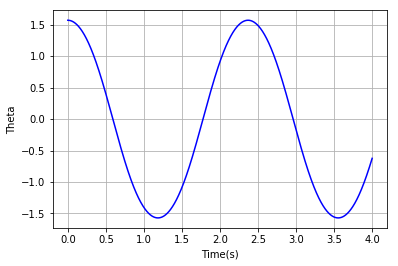

In [217]:
plot(t, sol[:, 0], 'b', label='$\mathrm{exact}\ \\theta (t)\ (\mathrm{rad})$')
plt.ylabel('Theta')
plt.xlabel("Time(s)")
plt.grid()
print("When delta is 1, there is no oscillation because the period goes to infinity.")

In [218]:
##This enables me to see what values of sol are within 1% of pi/2
def time(t, sol):

    list0 = list(sol[:,0]) 
    m = list0[0]
    p=0
    count = 0
    peak_count = 0 
    for n in list0:
        p = list0[count+1]
        if ((n < p) and (n > m)): 
            i = list0.index(n) 
            return t[i]*2
        m=n
        count = count + 1
    return -1    

In [219]:
##Part b

def thetacalc(theta, delta_T1, delta_T2):
    ##determines what initial angle will result in a period equal to 2.007 s. 
    for i in theta:
        thetas = [i, 0]
        sol = odeint(dy_dt, thetas, t, args=(omega02, delta)) 
        temp_time = time(t, sol)
        if (temp_time >= delta_T1 and temp_time <= delta_T2): 
            return thetas
    return [-1, 0]

In [220]:
y_initial = thetacalc(theta, delta_T1, delta_T2)
sol = odeint(dy_dt, y_initial, t, args=(omega02, delta))

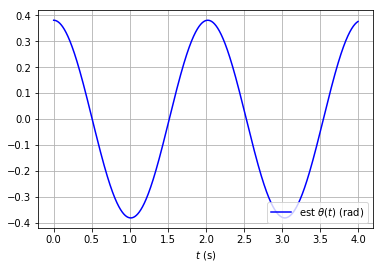


 Estimated intial theta value to obtain a period of roughly 2.007 s is: 0.380799109526

 Period is: 2.02660266027  and Tmax =  2.02716082239


In [221]:
figure(1)
# the estimate solution
plot(t, sol[:, 0], 'b', label='$\mathrm{est}\ \\theta (t)\ (\mathrm{rad})$')
legend(loc='lower right') 
xlabel('$t\ (\mathrm{s})$') 
grid()
show()
print ("\n Estimated intial theta value to obtain a period of roughly 2.007 s is:", y_initial[0])
print("\n Period is:", time(t, sol), " and Tmax = ", delta_T2)

In [222]:
##1 b) I create a linspace for E0 such that E0 slowly approches g so delta --> 1. We assume m = q = 1 for simplicity. 

E0 = linspace(0, 9.7, 100) #E0 approachs g to make delta approach 1 t_end = 10.
t = linspace(t_start, t_end, nt)
Ts = []
deltas = []
y0 = [theta0, 0]
def delts(q, E0, m, g): 
    return q*E0/(m*g)


In [223]:
for n in E0:
    delta = delts(1, n, m, g) 
    deltas.append(delta)
    sol = odeint(dy_dt, y0, t, args=(omega02, delta)) 
    Ts.append(time (t, sol))


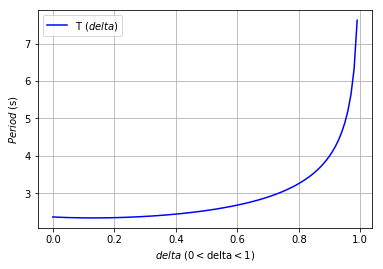


 The period approaches infinity as delta approaches 1


In [225]:
figure(2)

plot(deltas, Ts, 'b', label='$\mathrm{T}\ (delta)$')
legend(loc='upper left')
xlabel('$delta\ (\mathrm{0<delta<1})$')
ylabel('$Period\ (\mathrm{s})$')
grid()
show()
print ("\n The period approaches infinity as delta approaches 1")